# 1. Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import  MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# pipeline
from sklearn.pipeline import Pipeline

#for classification modeling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# 2. Read in Dataset

In [4]:
pd.options.display.max_columns = None
data = pd.read_csv('Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df = data.copy()

# 3. Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From the information above, we infer the following: 
- The dataset contains 7043 rows and 21 columns.
- No null values in this dataset.
- The `TotalCharges` field is defined as an object while it contains numeric values.

  

In [7]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [8]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace(0, 'No')
df['SeniorCitizen'] = df['SeniorCitizen'].replace(1, 'Yes')

df['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
# Return the number of unique values in each field.
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

The number of unique customer IDs are equal to the number of rows, implying that there are no duplicates in this dataset.

In [10]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
#We drop the null values from the dataset
df.dropna(inplace = True)

In [12]:
# print unique values on fields with qualitative values.
for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        print(f'{col} : {df[col].unique()}')

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : ['No' 'Yes']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


## Descriptive Statistics of numeric columns.

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


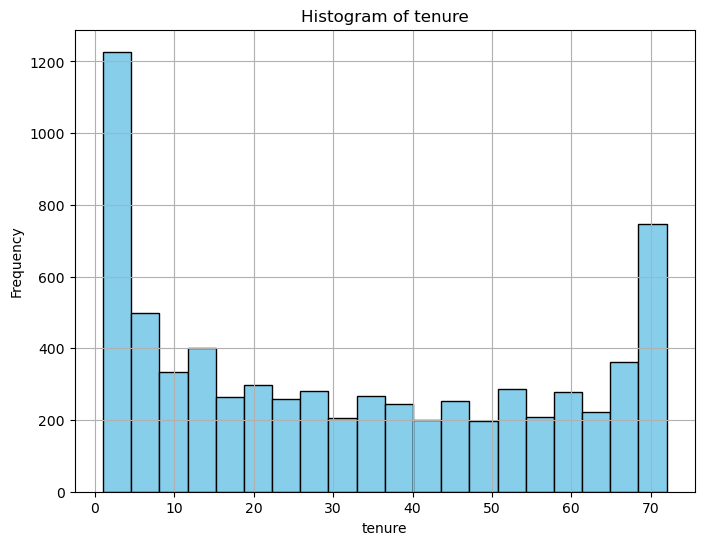

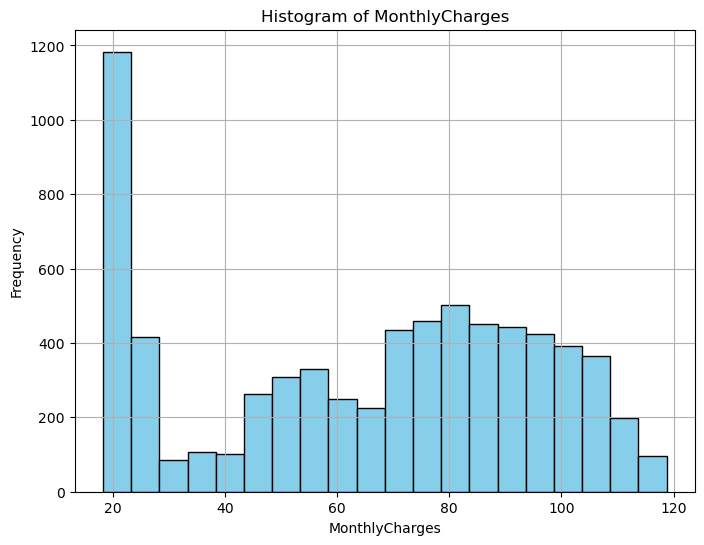

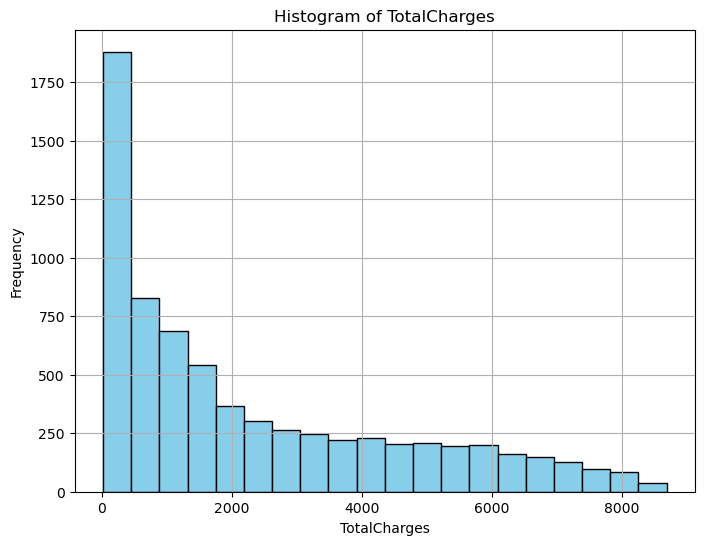

In [15]:
# Numeric features
numeric_features = df.select_dtypes(include=['float64', 'int64'])

# Plot histograms for numeric columns
for col in numeric_features.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

 # 4. Feature Engineering

The `customerID` column does not provide meaningful information for predicting churn. We drop it.

In [16]:
df.drop('customerID', axis=1, inplace=True)

## Feature Selection

In [17]:
#Distribution between churned and active customers
churn_counts = df['Churn'].value_counts()
churn_counts

Churn
No     5163
Yes    1869
Name: count, dtype: int64

We will visualize categorical features separately from the numeric features and vise versa.

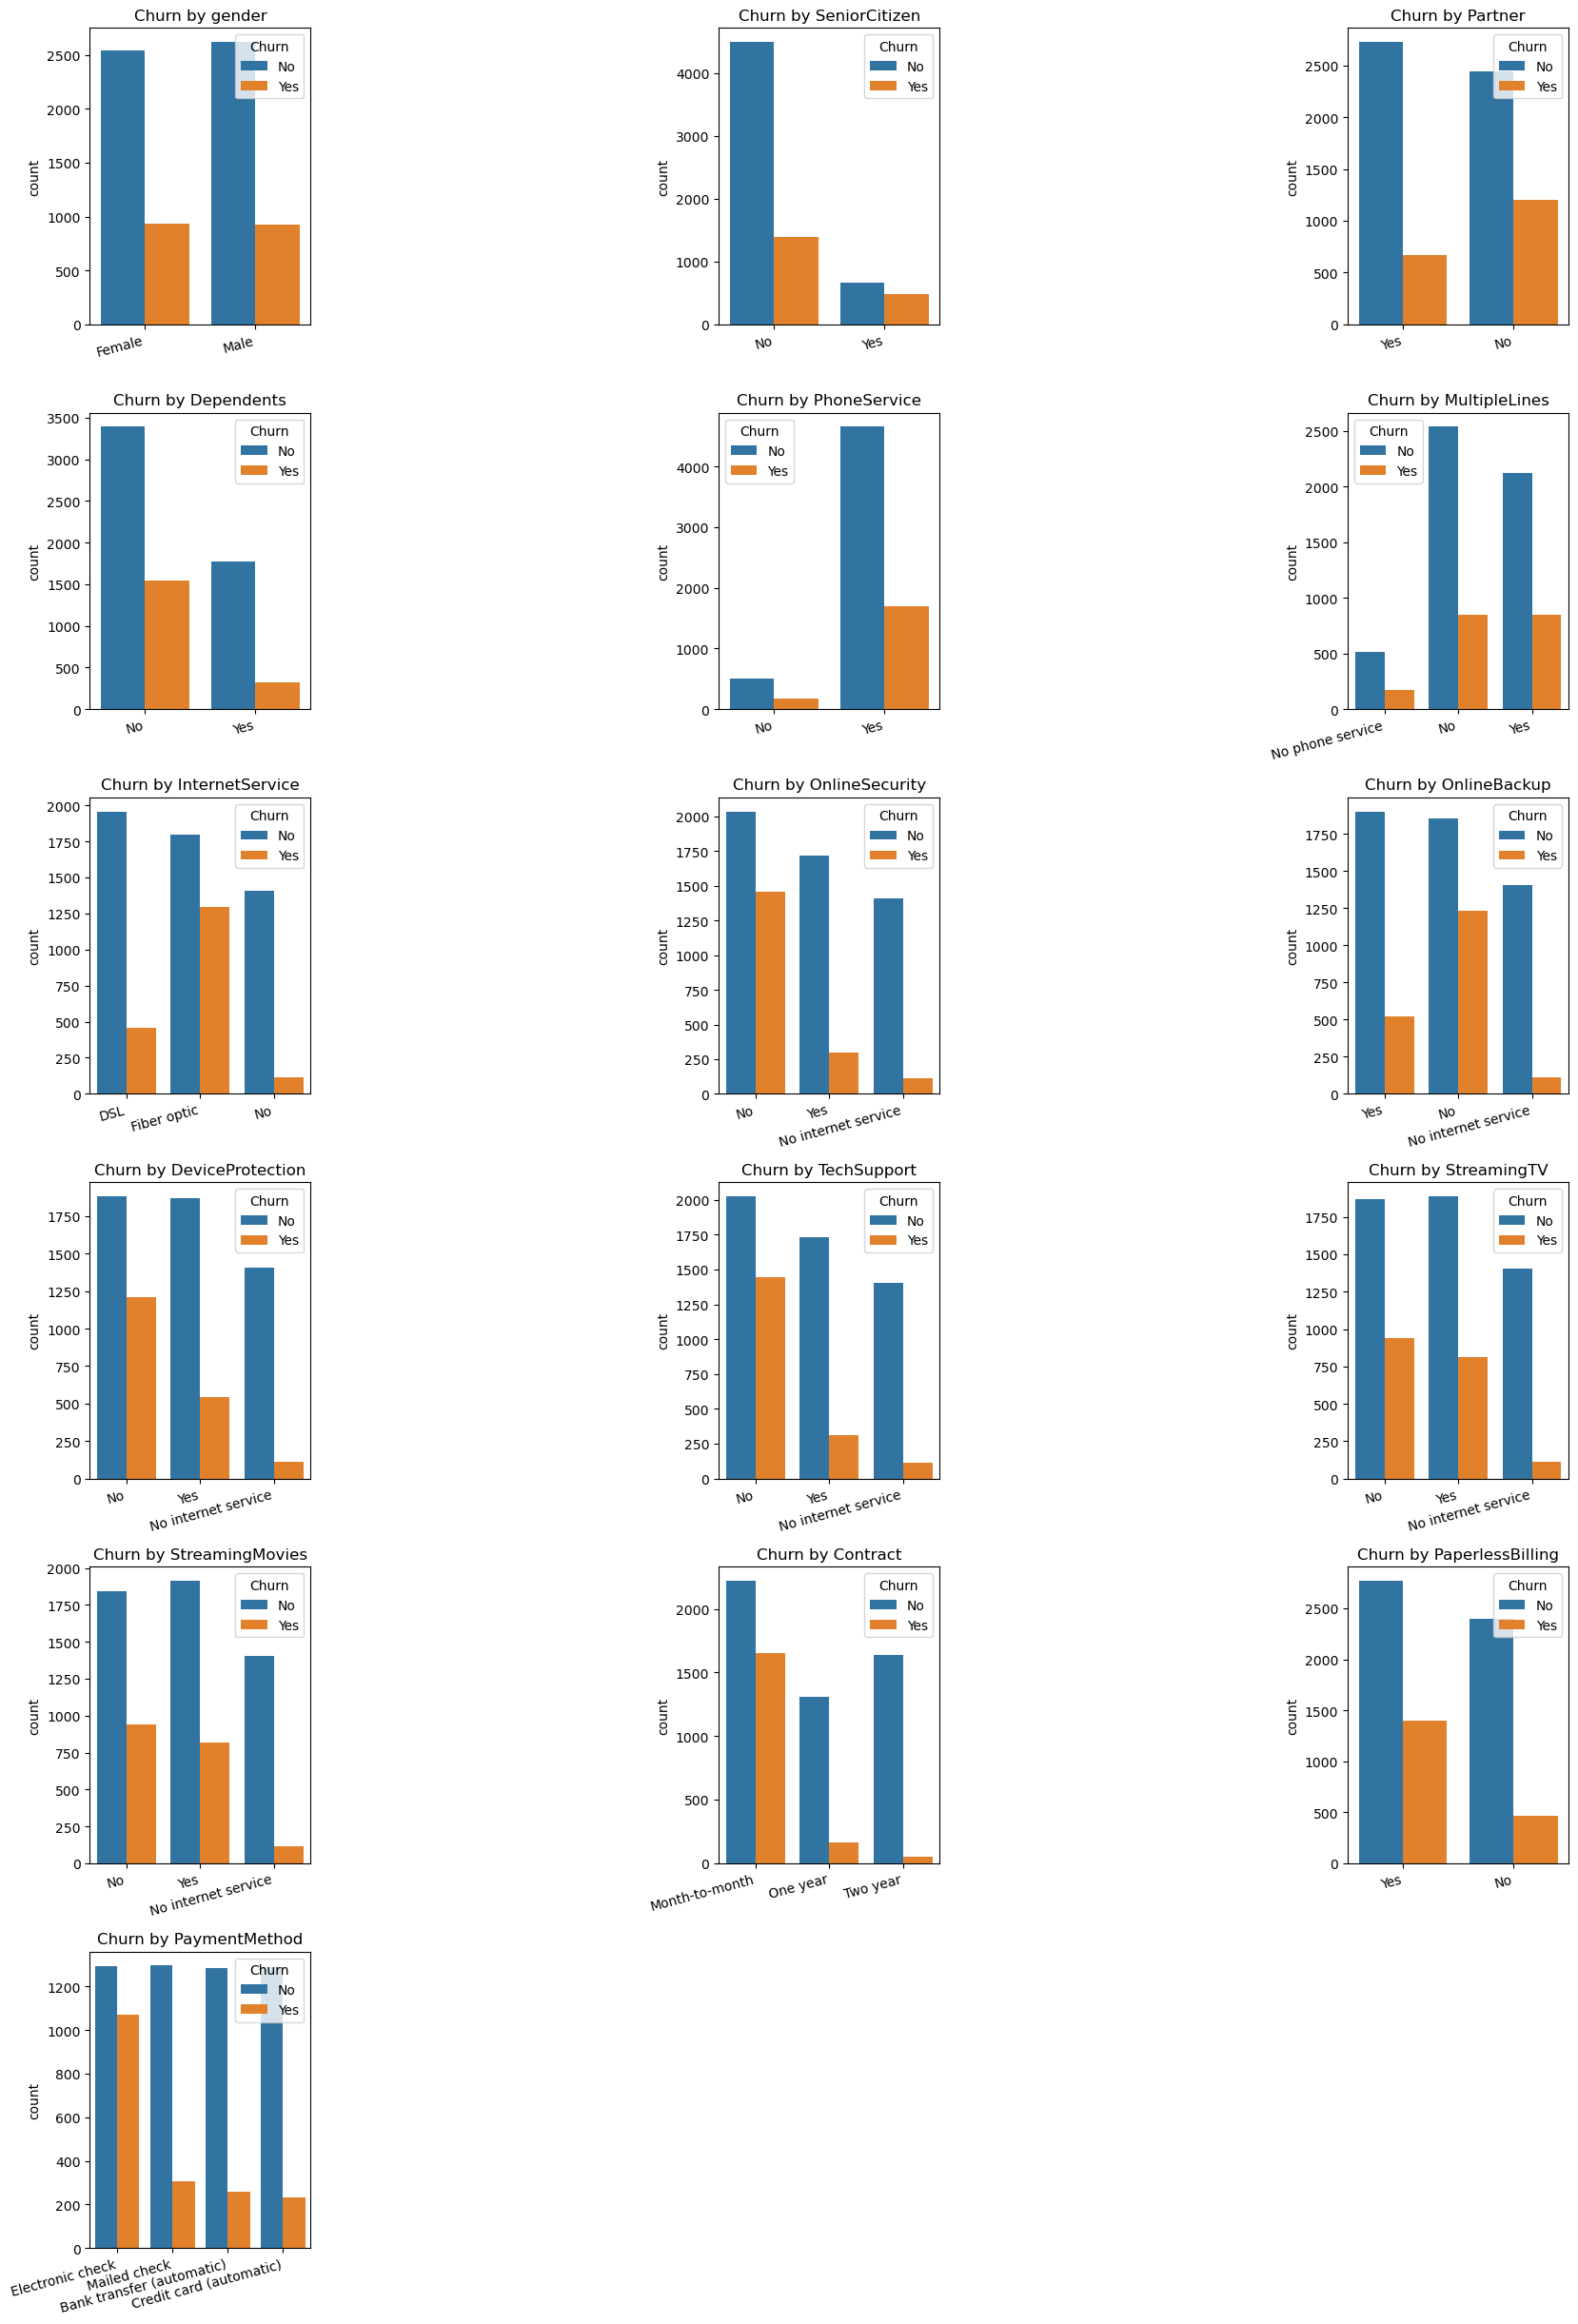

In [18]:
# Categorical features
categorical_features = df.select_dtypes(include=['object'])

# Set figure size
plt.figure(figsize=(20, 40))

#plot bar graph for all categorical features 
for i, col in enumerate(categorical_features.iloc[:, :-1]):
    plt.subplot(10, 6, i*2+1) # Create a subplot with odd index
    sns.countplot(data=categorical_features,
                  x=col,
                  hue=categorical_features['Churn'])
    plt.xticks(rotation=15, ha='right')
    plt.xlabel('')
    plt.title(f'Churn by {col}')

plt.tight_layout()
plt.show()

These visualizations suggests that there is no significant difference in churn rates between genders, as both genders churn at approximately the same rate. Additionally, individuals with or without phone service appear to churn at an equal rate, implying that the presence of a phone service does not significantly impact churn behavior.

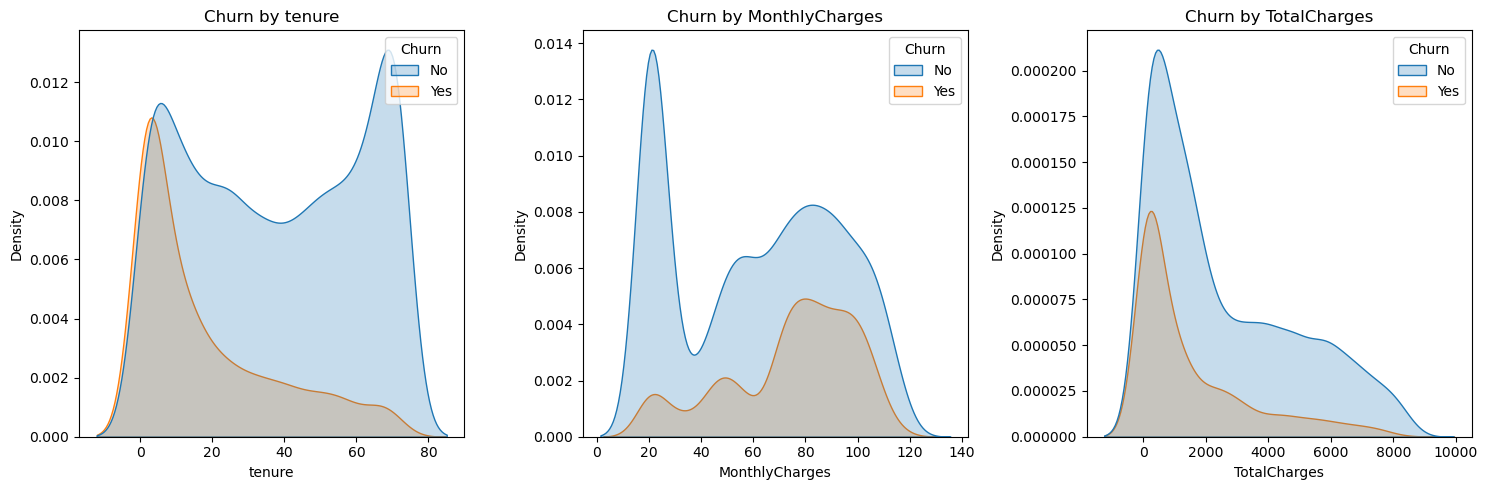

In [19]:
# Set figure size
plt.figure(figsize=(15, 5))

# Plot KDE plots for numeric features
for i, col in enumerate(numeric_features.columns):
    plt.subplot(1, len(numeric_features.columns), i+1)
    sns.kdeplot(data=df, x=col, hue='Churn', fill=True)
    plt.title(f'Churn by {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

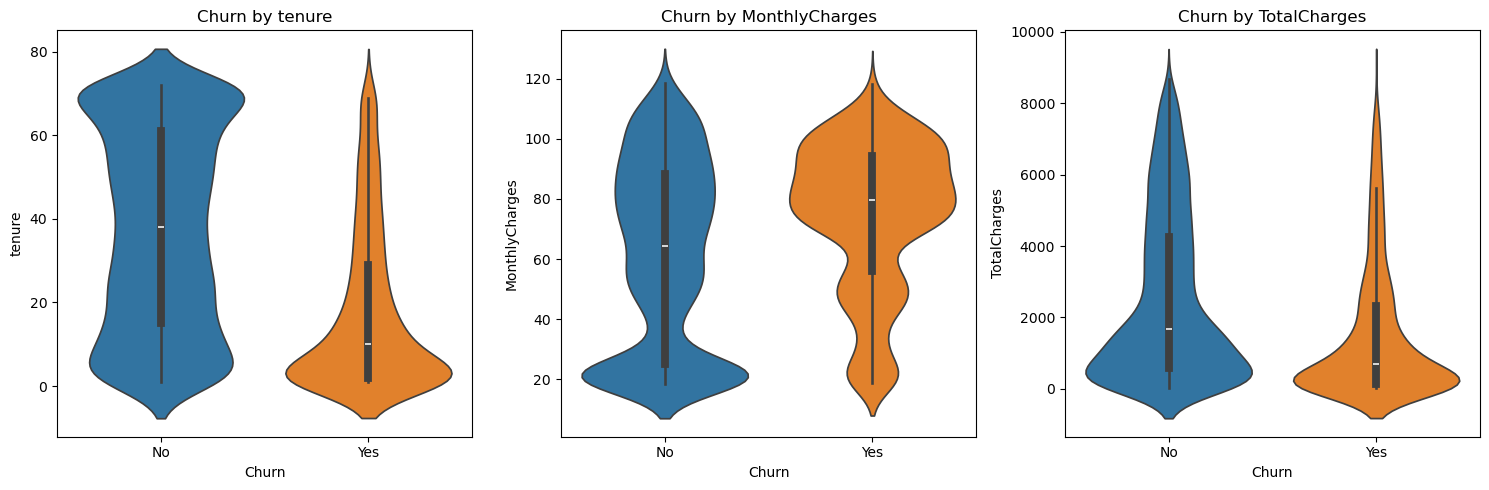

In [20]:
plt.figure(figsize=(15, 5))
# Plot violin plots for numeric features
for i, col in enumerate(numeric_features.columns):
    plt.subplot(1, len(numeric_features.columns), i+1)
    sns.violinplot(x='Churn', y=col, hue='Churn', data=df)
    plt.title(f'Churn by {col}')
    plt.xlabel('Churn')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

The findings suggest that customers with shorter tenure are more prone to churning. Additionally, clients with higher monthly charges exhibit higher churn rates, while those with lower total charges also display elevated churn rates. To finalize our feature selection process, we will utilize a correlation matrix to identify and prioritize the most influential factors associated with churn. We will convert the categorical data to numeric first.

### Label encoding

In [21]:
encoder = LabelEncoder()
categorical_encoded = categorical_features.apply(lambda x: encoder.fit_transform(x))

In [22]:
categorical_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [23]:
df_new = pd.concat([categorical_encoded, numeric_features], axis  = 1)
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,29.85,29.85
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,34,56.95,1889.50
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,2,53.85,108.15
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,45,42.30,1840.75
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,2,70.70,151.65


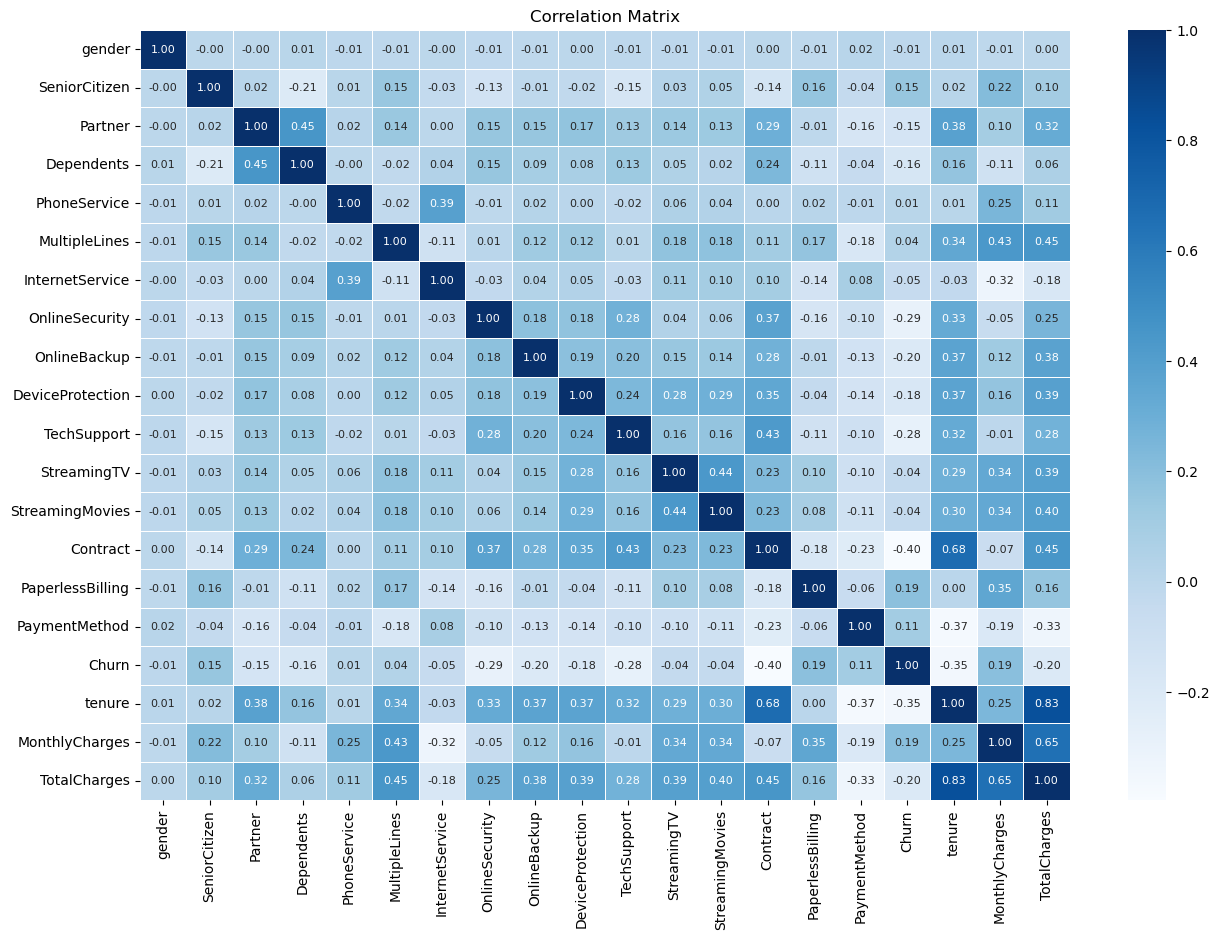

In [24]:
correlation_matrix = df_new.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot= True, cmap='Blues', fmt=".2f",center= 0.3, linewidths=0.5,annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

We deduce the following: 
- The `gender` and `PhoneService` have an absolute correlation of 0.01 with the `Churn', indicating that customer churning is not influenced by these columns.
- The correlation between `tenure` and `TotalCharges` is 0.83, indicating that these two columns are highly correlated. We will drop `TotalCharges` to prevent overfitting the model.

In [25]:
df_new.drop(['gender', 'PhoneService', 'TotalCharges'], axis= 1, inplace=True)

In [26]:
df_new.head(2)

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges
0,0,1,0,1,0,0,2,0,0,0,0,0,1,2,0,1,29.85
1,0,0,0,0,0,2,0,2,0,0,0,1,0,3,0,34,56.95


# 5. Model Training and Evaluation

In [27]:
X = df_new.drop(['Churn'],axis =1)
y = df_new['Churn']


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#Scaling the data to improve accuracy
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [29]:
log = LogisticRegression()
log.fit(X_train, y_train)
log.score(X_test, y_test)

0.7919431279620853

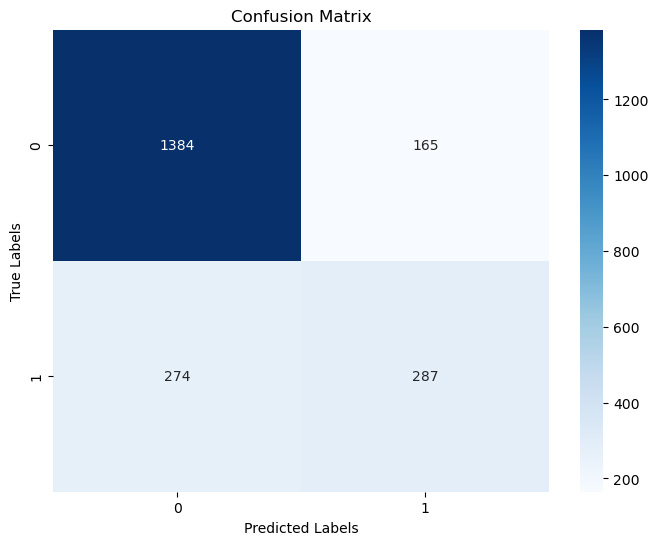

In [30]:
#Predict values
y_pred0 = log.predict(X_test)

# Compute confusion matrix
cm_log = confusion_matrix(y_test, y_pred0)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Random Forest

In [31]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7815165876777251

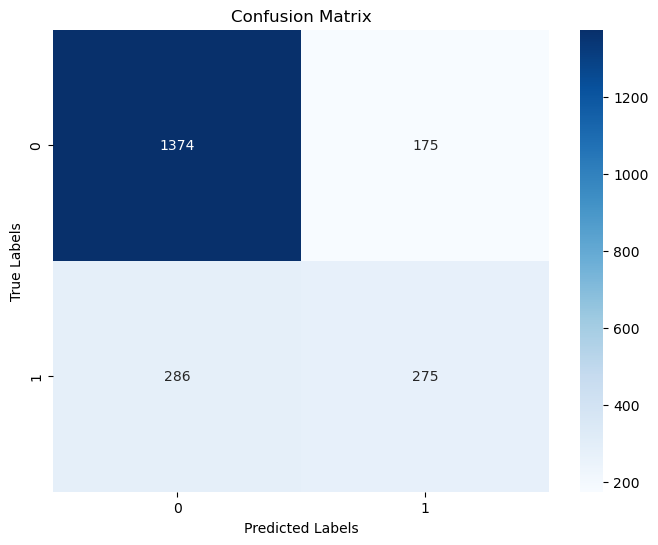

In [32]:
#Predict values
y_pred1= rf.predict(X_test)

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred1)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Support Vector Machine

In [33]:
SVM = SVC(kernel = 'linear')
SVM.fit(X_train, y_train)
SVM.score(X_test, y_test)

0.7900473933649289

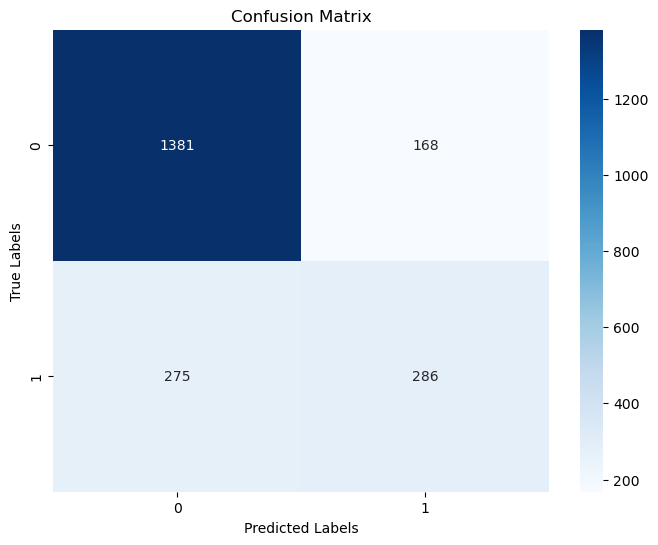

In [34]:
#Predict values
y_pred2 = SVM.predict(X_test)

# Compute confusion matrix
cm_svm = confusion_matrix(y_test, y_pred2)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Decision Tree

In [35]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)



0.718957345971564

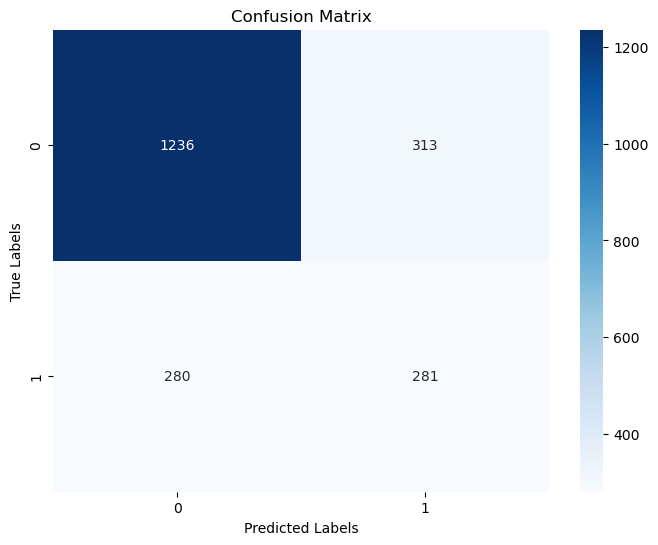

In [36]:
#Predict values
y_pred3 = dt.predict(X_test)

# Compute confusion matrix
cm_dt = confusion_matrix(y_test, y_pred3)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Summary

1. Logistic Regression:  
    - Accuracy 79.19%
  
2. Random Forest:  
    - Accuracy 78.15%,

3. Support Vector Machine:  
    - Accuracy 79%

4. DecisionTrees:
    - Accuracy 71.89%